In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Linear Regression

## 1. Data

In [95]:
# read data
cars = pd.read_csv('turboaz.csv')
cars.head() # I have first read the provided data and wanted to see first values

,Sheher,Marka,Model,Buraxilish ili,Ban novu,Reng,Muherrikin hecmi,Muherrikin gucu,Yanacaq novu,Yurush,Suretler qutusu,Oturucu,Yeni,Qiymet,Extra Info,Seller comment
0,Sumqayıt,Mercedes,C 200,1999,Sedan,Qara,2.0 L,175 a.g.,Benzin,366 000 km,Avtomat,Arxa,Xeyr,12500 AZN,Kreditdədir,Barter mümkündür
1,Bakı,Mercedes,C 180,2014,Sedan,Qara,1.6 L,167 a.g.,Benzin,102 000 km,Avtomat,Arxa,Xeyr,31500 $,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."
2,Sumqayıt,Mercedes,C 240,2002,Sedan,Qara,2.6 L,177 a.g.,Benzin,469 700 km,Avtomat,Arxa,Xeyr,11700 AZN,Kreditdədir,Barter mümkündür
3,Şirvan,Mercedes,C 180,1998,Sedan,Göy,1.8 L,125 a.g.,Benzin,556 680 km,Avtomat,Arxa,Xeyr,9700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Mawin BAKIDADI. Tecili satilir yaxwi veziyetde...
4,Sumqayıt,Mercedes,C 220,2000,Sedan,Gümüşü,2.2 L,150 a.g.,Dizel,300 000 km,Avtomat,Arxa,Xeyr,12700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Vurugu udari deyisen detali curuyu qetiyyen yo...


In [96]:
import re
# get columns and preprocess features
X1_cars = cars["Yurush"].replace('[^0-9]', '', regex=True).astype(float) # I first remove everything from the mileage that is not digit and then convert the string that we got into numeric float type as it was written in instructions
X2_cars = pd.to_numeric(cars["Buraxilish ili"], errors="coerce") # year column which I also convert to numeric type and error part needed in case there is some problem the program does not crash but just write NAN

def convert_price(value):
    if pd.isna(value):
        return np.nan # for missing values check
    text = str(value)
    if "USD" in text or "$" in text: # here we check for currency, if USD, then convert to AZN by multiplying 1.7
        num = re.sub(r"[^\d.]", "", text) # keep only digits and decimal point by substituting not needed values
        return float(num) * 1.7
    num = re.sub(r"[^\d.]", "", text) # if it is AZN, we do nothing and just keep digits and decimals
    return float(num)

Y_cars = cars["Qiymet"].map(convert_price)

mask = (X1_cars.notna() & X2_cars.notna() & Y_cars.notna()) # I need to keep only rows which are functioning, if one of the rows not working then the whole process will fail, so I use notna function to have those which are not missing, so only values where all three values exist
X1_cars, X2_cars, Y_cars = X1_cars[mask], X2_cars[mask], Y_cars[mask]


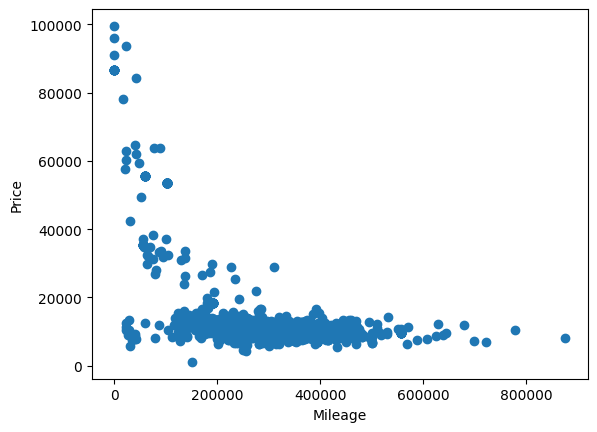

In [97]:
# plot X1 and Y
plt.scatter(X1_cars, Y_cars)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

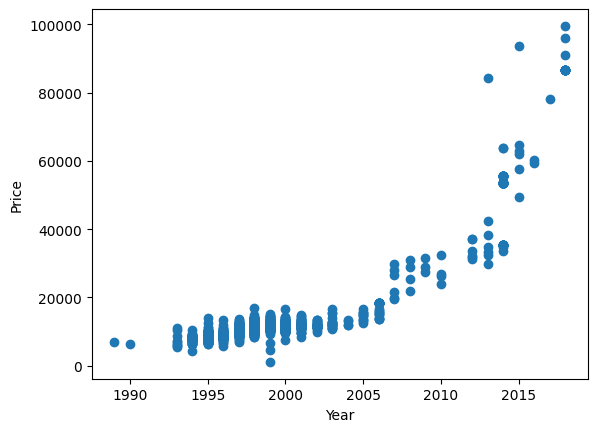

In [98]:
# plot X2 and Y
plt.scatter(X2_cars, Y_cars)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

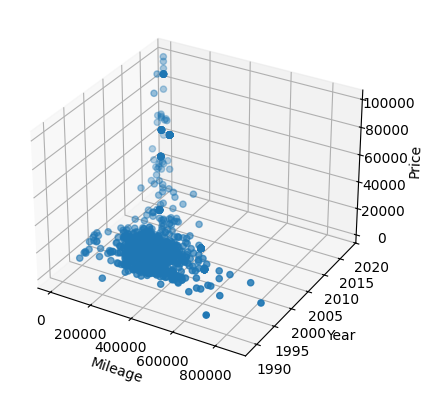

In [99]:
# plot X1, X2 and Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1_cars, X2_cars, Y_cars)

ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

plt.show()

In [100]:
# create copies of original for later use
X1_cars_copy = X1_cars.copy()
X2_cars_copy = X2_cars.copy()
Y_cars_copy = Y_cars.copy()
# in order to later compare the raw data with normalized one we copy columns

# normalize data using z-score
X1_cars = (X1_cars - X1_cars.mean()) / X1_cars.std()
X2_cars = (X2_cars - X2_cars.mean()) / X2_cars.std()
Y_cars = (Y_cars - Y_cars.mean()) / Y_cars.std()
# formula for calculating z score ((value - mean)/std), so I have done the same for three values

## 2. Linear regression from scratch

In [101]:
# implement linear hypothesis function
# hypotheses function h(x) = θ0 + θ1 * x1 + θ2 * x2
def h_linear(X, T): # X is the list of features and Y is the array of parameters
    x1, x2 = X
    thete0, thete1, theta2 = T
    return theta0 + theta1 * x1 + theta2 * x2

In [102]:
# implement cost function
# formula for cost function J(Θ) = (1 / (2m)) *  sum(h(x(i)) - y(i))^2
def J_linear(h, Y): # h is the predicted values from our hypotheses function, y is the target values
    m = len(Y)
    return (1 / (2 * m)) * np.sum((h - Y) ** 2)

In [103]:
# create data matrix with three features (add bias feature)
X0_cars = np.ones(len(X1_cars)) # add a column of ones so 0o can be treated as weight / np.ones creates a vector of 1s
X_cars = np.column_stack((X0_cars, X1_cars, X2_cars)) # this is needed for creating one matrix will all features provided
# mainly this all needed cause our hypothesis can be written in matrix form of X * 0

In [104]:
# initialize parameters vector to zeros
T_cars = np.zeros(3) # [theta1, theta1, theta2] -> array of three zeros

In [105]:
# set learning rate and number of iterations
alpha_cars = 0.001
iterations_cars = 10000

In [106]:
# implement gradient descent
def gradient_descent(X, Y, T, h_function, J_function, alpha, iterations):
    # store costs for plotting
    cost_history = [0] * iterations
    m = len(Y)

    # update parameters
    for iteration in range(iterations):
        h = X @ T # matrix multiplication h = X * 0

        # print useful information
        if iteration % 1000 == 0: 
            print("Iteration #%d" % iteration)         
            print("Cost:", J_function(h,Y))

        # calculate gradient
        gradient = (1/m) * (X.T @ (h - Y)) # formula for gradient decent
        
        # update parameters
        T -= alpha * gradient

        # calculate new cost and store
        cost = J_function(X @ T, Y)
        cost_history[iteration] = cost

    return T, cost_history

In [107]:
# get optimized parameter values and cost history
optimal_T_cars, cost_history_cars = gradient_descent(
    X_cars, # data matrix [1, x1, x2]
    Y_cars, # target values such as normalized prices
    T_cars, # initial parameter vector [theta0, theta1, theta2]
    h_linear, # hypothesis function
    J_linear, # cost function
    alpha_cars, # learning rate like 0.001
    iterations_cars # number of iterations 10000
)

Iteration #0
Cost: 0.49962349397590367
Iteration #1000
Cost: 0.14536267254784296
Iteration #2000
Cost: 0.1172513998516063
Iteration #3000
Cost: 0.11061262798913984
Iteration #4000
Cost: 0.10802698912214966
Iteration #5000
Cost: 0.10694097937378141
Iteration #6000
Cost: 0.10648112300838104
Iteration #7000
Cost: 0.10628624090128119
Iteration #8000
Cost: 0.10620364497984434
Iteration #9000
Cost: 0.10616863845502367


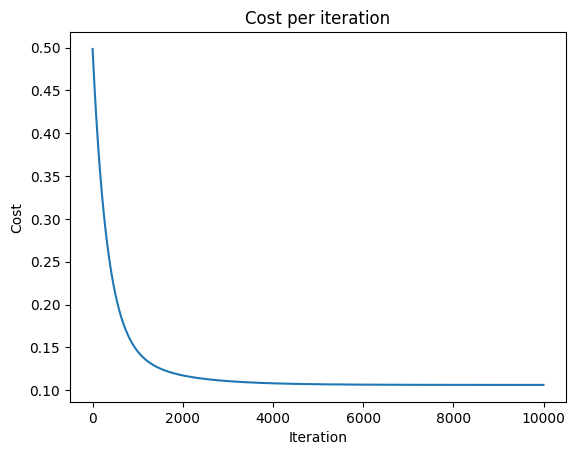

In [108]:
# plot the cost as a function of iterations
plt.plot(cost_history_cars)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

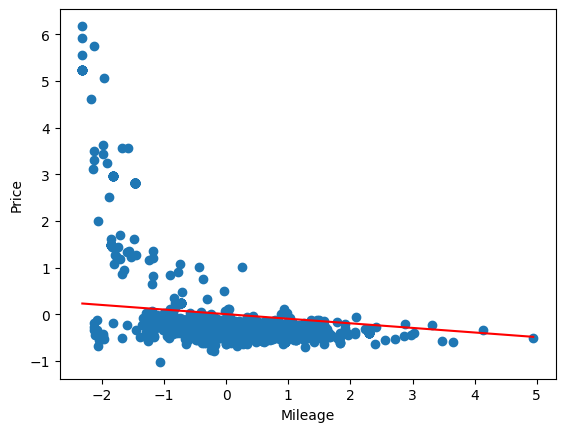

In [109]:
# plot points of X1 and Y
plt.scatter(X1_cars, Y_cars)
plt.xlabel('Mileage')
plt.ylabel('Price')

X2_mean = np.mean(X2_cars) # average years of all cars
X1_sorted = np.linspace(X1_cars.min(), X1_cars.max(), 100) # creates 100 dots on our graphs between minimum and maximum mileage

# make predictions and plot
predictions_cars = (optimal_T_cars[0] + optimal_T_cars[1] * X1_sorted + optimal_T_cars[2] * X2_mean) # our linear regression formula
plt.plot(X1_sorted, predictions_cars, c='r') # model's prediction line across different mileage
plt.show()

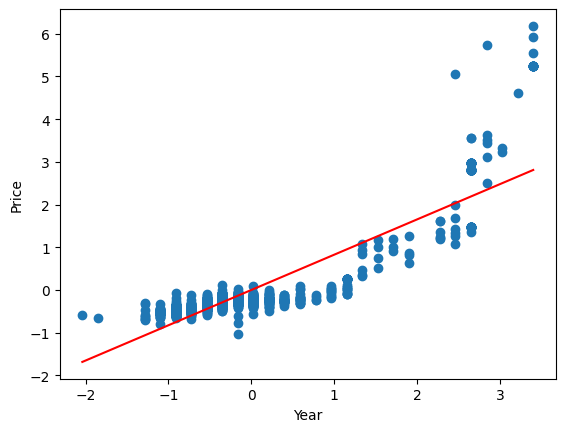

In [110]:
# plot points of X2 and Y
plt.scatter(X2_cars, Y_cars)
plt.xlabel('Year')
plt.ylabel('Price')

X1_mean = np.mean(X1_cars) # here we choose Mileage for the mean and other variables are constant
X2_sorted = np.linspace(X2_cars.min(), X2_cars.max(), 100) # again 100 dots but for minimum and maximum years

# make predictions and plot
predictions_cars = (optimal_T_cars[0] + optimal_T_cars[1] * X1_mean + optimal_T_cars[2] * X2_sorted) # linear equation
plt.plot(X2_sorted, predictions_cars , c='r') # for showing how predicted price changed

plt.show()

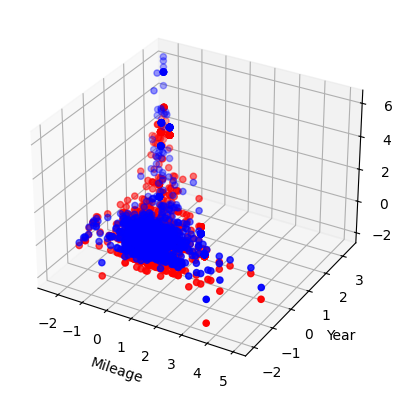

In [111]:
# plot X1, X2, Y, and predicted Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # our 3d visualization
ax.scatter(X1_cars, X2_cars, Y_cars, c='b') # plot points

predictions_cars = X_cars @ optimal_T_cars # dot product of X * 0 / mainly needed to compute model's predicted price for each car
ax.scatter(X1_cars, X2_cars, predictions_cars, c='r') # plot predicting points

ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

plt.show()

In [112]:
# make predictions
cars_predictions_scratch = X_cars @ optimal_T_cars # again dot product of our data matrix on optimized parameters

In [113]:
# evaluate model
Y_pred_original = (cars_predictions_scratch * Y_cars_copy.std()) + Y_cars_copy.mean() # reserved normalization that we had before

print(mean_squared_error(Y_cars_copy, Y_pred_original)) # comparison of actual and predicted
print(r2_score(Y_cars_copy, np.round(Y_pred_original, 2))) # r2 score

39560111.833688624
0.7875324103457432


In [114]:
# predict the price for the given car
mileage = 240000
year = 2000
actual_price = 11500

# normalize
mileage = (mileage - X1_cars_copy.mean()) / X1_cars_copy.std() # normalization for mileage
year = (year - X2_cars_copy.mean()) / X2_cars_copy.std() # normalization for year
actual_price = (actual_price - Y_cars_copy.mean()) / Y_cars_copy.std() # normalization for price

# predict
predicted_price = (optimal_T_cars[0] + optimal_T_cars[1] * mileage + optimal_T_cars[2] * year)

# revert back to original range and print the prediction
predicted_price = predicted_price * Y_cars_copy.std() + Y_cars_copy.mean()
print(predicted_price)
print(11500)

15841.438881101605
11500


In [115]:
# predict the price for the given car
mileage = 415558
year = 1996
actual_price = 8800

# normalize
mileage = (mileage - X1_cars_copy.mean()) / X1_cars_copy.std() # again normalization of all features
year = (year - X2_cars_copy.mean()) / X2_cars_copy.std()
actual_price = (actual_price - Y_cars_copy.mean()) / Y_cars_copy.std()

# predict
predicted_price = (optimal_T_cars[0] + optimal_T_cars[1] * mileage + optimal_T_cars[2] * year)

# revert back to original price and print the prediction
predicted_price = predicted_price * Y_cars_copy.std() + Y_cars_copy.mean()
print(predicted_price)
print(8800)

5426.065566509864
8800


## 3. Linear regression using library 

In [116]:
# create data matrix of two original features
X_train_cars = np.column_stack((X1_cars_copy, X2_cars_copy))

In [117]:
# create linear regression model instance and train it
regression_model = LinearRegression()
regression_model.fit(X_train_cars, Y_cars_copy)

LinearRegression()

In [118]:
# make predictions
cars_predictions_library = regression_model.predict(X_train_cars)

In [119]:
# evaluate model
print(mean_squared_error(Y_cars_copy, cars_predictions_library)) # mean and r2 score
print(r2_score(Y_cars_copy, cars_predictions_library))

39556044.57986156
0.7875542502164047


In [120]:
# create data matrix for test cars and predict
X_test_cars = [[240000, 2000], [415558, 1996]]
print(regression_model.predict(X_test_cars))

[15820.54127243  5453.69414862]


## 4. Linear regression using normal equation

In [121]:
# implement normal equation and apply it to normalized data
T_normaleq = np.linalg.inv(X_cars.T @ X_cars) @ X_cars.T @ Y_cars # this is (XtX)^-1 * XT and multiply by the actual price

In [122]:
print(T_normaleq)

[ 1.69603914e-14 -9.33437483e-02  8.30867464e-01]


# Logistic Regression

## 1. Data

In [123]:
# read data
exams = pd.read_csv('exams.csv')

In [124]:
# get columns
X1_exams = exams["exam_1"] # exam scores
X2_exams = exams["exam_2"] # exam scores
Y_exams = exams["admitted"] # passed or not passed 1 or 0

In [125]:
# create copies of original for later use
X1_exams_copy = X1_exams.copy()
X2_exams_copy = X2_exams.copy()
Y_exams_copy = Y_exams.copy()

# scale data using min-max scaling
X1_exams = (X1_exams - X1_exams.min()) / (X1_exams.max() - X1_exams.min()) # this is the min–max normalization formula
X2_exams = (X2_exams - X2_exams.min()) / (X2_exams.max() - X2_exams.min()) # formula ((x-xmin)/(xmax-xmin)) / make features be between 0 and 1

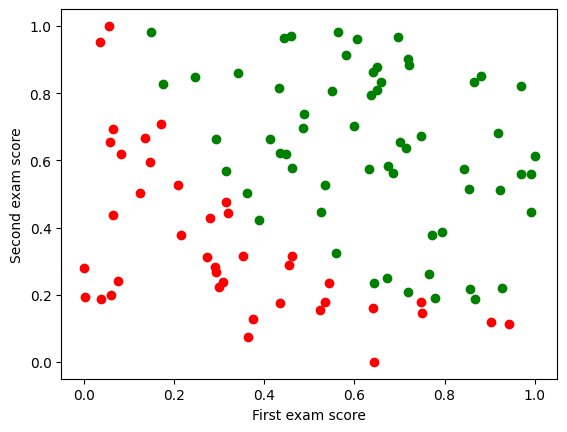

In [126]:
# plot points of X1, X2 and color-code labels
plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.scatter(X1_exams[Y_exams == 1], X2_exams[Y_exams == 1], color = 'green')
plt.scatter(X1_exams[Y_exams == 0], X2_exams[Y_exams == 0], color = 'red')

## 2. Logistic regression from scratch 

In [127]:
# implement sigmoid hypothesis function
def h_logistic(X, T):
    z = X @ T
    return 1 / (1 + np.exp(-z)) # the formula is 1/1+ e^(-Θ^T * X)

In [128]:
# implement cost function
def J_logistic(h, Y):
    m = len(Y)
    epsilon = 1e-5
    cost = -(1/m) * np.sum(Y * np.log(h + epsilon) + (1 - Y) * np.log(1 - h + epsilon)) # cost function formula for logistic regression
    return cost # so mainly here we check how close is the predictions h to out actual labels Y

In [129]:
# create data matrix with three features (add bias feature)
X0_exams = np.ones(len(X1_exams)) # here we add bias
X_exams = np.column_stack((X0_exams, X1_exams, X2_exams))

In [130]:
# initialize parameters vector to zeros
T_exams = np.zeros(X_exams.shape[1])

In [131]:
# set learning rate and number of iterations
alpha_exams = 0.1
iterations_exams = 10000

In [132]:
# implement gradient descent for logistic regression
def gradient_descent(X, Y, T, h_function, J_function, alpha, iterations):
    # store costs for plotting
    cost_history = [0] * iterations
    m = len(Y)

    # update parameters
    for iteration in range(iterations):
        h = h_function(X, T) # matrix multiplication h = X * 0 / same thing here just adding hypothesis function

        # calculate gradient
        gradient = (1/m) * (X.T @ (h - Y)) # formula for gradient decent

        # update parameters
        T -= alpha * gradient

        # calculate new cost and store
        cost = J_function(h_function(X, T), Y)
        cost_history[iteration] = cost

        # print useful information
        if iteration % 1000 == 0:
            print("Iteration #%d" % iteration)
            print("Cost:", J_function(h,Y))

    return T, cost_history

In [133]:
# get optimized parameter values and cost history
optimal_T_exams, cost_history_exams = gradient_descent(
    X_exams, Y_exams, T_exams, h_logistic, J_logistic, alpha_exams, iterations_exams
); # like in the previous part we just added all parameters


Iteration #0
Cost: 0.6931271807599428
Iteration #1000
Cost: 0.37131048993737503
Iteration #2000
Cost: 0.3036545295560171
Iteration #3000
Cost: 0.2735061114334153
Iteration #4000
Cost: 0.25630401685528603
Iteration #5000
Cost: 0.24515133769296985
Iteration #6000
Cost: 0.23733879438969127
Iteration #7000
Cost: 0.23157538125566735
Iteration #8000
Cost: 0.22716349403333813
Iteration #9000
Cost: 0.2236913070793889


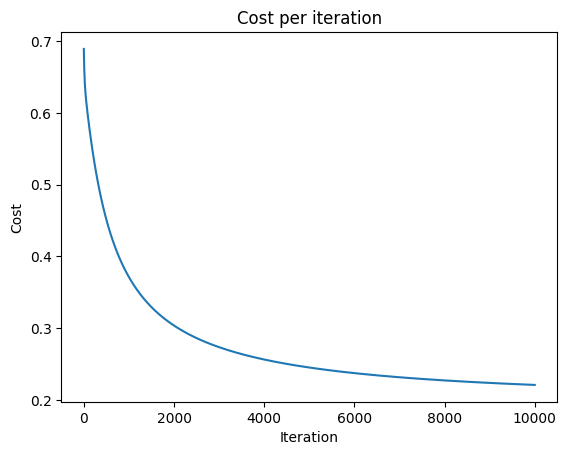

In [134]:
# plot the cost as a function of iterations
plt.plot(cost_history_exams)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

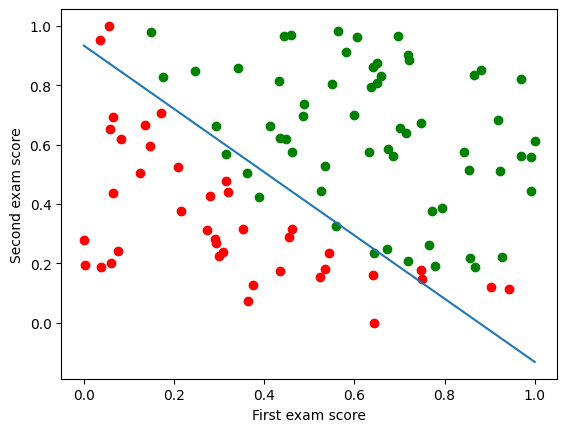

In [136]:
# plot points of X1, X2, and color-code labels
plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.scatter(X1_exams[Y_exams == 1], X2_exams[Y_exams == 1], color = 'green')
plt.scatter(X1_exams[Y_exams == 0], X2_exams[Y_exams == 0],color = 'red')

# plot decision boundary
X_values = np.array([X1_exams.min(), X1_exams.max()]) # min is the smallest value of exam 1 and max the largest
Y_values = -(optimal_T_exams[0] + optimal_T_exams[1]*X_values) / optimal_T_exams[2] # this is mainly decision boundary equation = theta0 + theta1*x1 + theta2*x2
plt.plot(X_values, Y_values)

In [137]:
# make predictions with threshold 0.5
exams_probabilities_scratch = h_logistic(X_exams, optimal_T_exams) # this is mainly to say that the probability of being admitted is between 0 and 1
exams_predictions_scratch = np.where(exams_probabilities_scratch>=0.5, 1, 0 ) # we will need predictions with the threshold of 0.5, mainly te ones that are more than or equal to 0.5 will be automatically turned to 1, others tu 0

In [138]:
# evaluate model
print(accuracy_score(Y_exams, exams_predictions_scratch))

0.89


In [141]:
# predict whether the following student passed
exam1 = 55
exam2 = 70

# scale
exam1 = (exam1 - X1_exams_copy.min()) / (X1_exams_copy.max() - X1_exams_copy.min())
exam2 = (exam2 - X2_exams_copy.min()) / (X2_exams_copy.max() - X2_exams_copy.min()) # again min max normalization for both

# predict
predicted_value = h_logistic(([1, exam1, exam2]), optimal_T_exams) # prediction for one student with bias factor equal to 1
print(predicted_value) # calculates the probability of being admitted

0.5534893902055654


In [140]:
# predict whether the following student passed
exam1 = 40
exam2 = 60

# scale
exam1 = (exam1 - X1_exams_copy.min())/(X1_exams_copy.max() - X1_exams_copy.min())
exam2 = (exam2 - X2_exams_copy.min())/(X2_exams_copy.max() - X2_exams_copy.min())

# predict
predicted_value = h_logistic([1, exam1, exam2], optimal_T_exams)
print(predicted_value) # calculates the probability of being admitted

0.04398410113953509


## 3. Logistic regression using library 

In [142]:
# create data matrix of two original features
X_train_exams = np.column_stack((X1_exams_copy, X2_exams_copy))

In [143]:
# create logistic regression model instance and train it
model = LogisticRegression()
model.fit(X_train_exams, Y_exams_copy)

LogisticRegression()

In [144]:
# make predictions with library
exams_predictions_library = model.predict(X_train_exams)

In [145]:
# evaluate model
print(accuracy_score(Y_exams_copy, exams_predictions_library))

0.89


In [147]:
# create data matrix for test students and predict
X_test_exams = [[55, 70], [40, 60]]
print(model.predict_proba(X_test_exams))

[[0.42967107 0.57032893]
 [0.99186143 0.00813857]]
